Giới thiệu về PLA:
- PLA là một thuật toán học máy cơ bản, dùng để phân loại dữ liệu trong trường hợp cụ thể tức là chỉ có 2 class hay được gọi là binary classification. Mặc dù đơn giản nhưng đây là nền tảng quang trọng để hiểu về các thuật toán học máy phức tạp hơn.

Giả sử ta có 2 tập hợp dữ liệu đã được gán nhãn. Bài toán đặt ra là từ dữ liệu của hai tập được gắn nhãn cho trước, hãy xây dựng một classifier để phân loại dữ liệu mới mà chưa được gán nhãn.

Hiểu đơn giản hơn, ta cần tìm vùng "lãnh thổ" của mỗi class để khi thêm điểm mới ta chỉ cần xem nằm ở lãnh thổ thuộc class nào. Vậy bải toán đặt ra là tìm ra đường phân chia hai class (boundary) sao cho đường này phân chia hai class một cách tốt nhất. Với mỗi chiều cao hơn thì đường phân chia sẽ có các tên gọi khác như là đường thẳng(2D), mặt phẳng(3D), siêu mặt phẳng(nD) nhưng ở đây chỉ gọi đơn giản là đường phân chia. Những đường này được gọi là giản đơn vì chúng có thể biểu diễn dưới dạng phương trình tuyến tính.

Bài toán Perceptron được phát biểu như sau: *Cho hai class được gán nhãn, hãy tìm một đường phẳng sao cho toàn bộ các điểm thuộc class 1 nằm về 1 phía, toàn bộ các điểm thuộc class 2 nằm về phía còn lại của đường phẳng đó. Với giả định rằng tồn tại một đường phẳng như thế.*
Nếu tồn tại một đường phẳng phân chia hai class thì ta gọi hai class đó là ***linearly separable***. Các thuật toán classification tạo ra các boundary là các đường phẳng được gọi chung là Linear Classifier.

Giả sử $\mathbf{X} = [x_1,x_2,x_3,...,x_N] \in R^{d*N}$ là ma trận chứa các điểm dữ liệu với mỗi cột ${x_i \in R^{d.1}$ là một điểm dữ liệu trong không gian $d$ chiều.

Giả sử thêm việc các nhãn tương ứng với các điểm dữ liệu trên là $\mathbf{y} = [y_1,y_2,y_3,...,y_N] \in R^{1.N}$ với $y_i \in \{-1,1\}$. Nếu $y_i = 1$ thì điểm $x_i$ thuộc class 1, ngược lại nếu $y_i = -1$ thì điểm $x_i$ thuộc class 2.

Tại một thời điểm ta tìm được đường phân chia có dạng phương trình linear:

$\mathbf{f_w}(x) = w_1x_1 + w_2x_2 + ... + w_dx_d + w_0 $<br>$= \mathbf{w^T\bar{x}} = 0$

Với: <br> $\mathbf{w} = [w_1,w_2,...,w_d,w_0] \in R^{(d+1).1}$ là vector trọng số<br> $\mathbf{\bar{x}} = [x_1,x_2,...,x_d,1] \in R^{(d+1).1}$ là vector mở rộng của vector $x$.

Dễ thấy sẽ có 2 vùng dữ liệu được phân chia bởi đường phân chia: <br> $H_1 = \{x|\mathbf{w^T\bar{x}} > 0\}$<br> $H_2 = \{x|\mathbf{w^T\bar{x}} < 0\}$<br> Với $H_1$ là vùng dữ liệu thuộc class 1 và $H_2$ là vùng dữ liệu thuộc class 2.

Ngắn gọn hơn ta có thể viết thành như sau:<br>
$lable(x) = 1 \text{ if } \mathbf{w^T\bar{x}} \geq 0 , \text{ otherwise } -1$<br>
Ta sẽ có hàm loss function như sau:<br>
$J(\mathbf{w}) = \sum_{x_i\in M}(-y_isgn(\mathbf{w}^T\mathbf{x_i}))$<br>
Với $M$ là tập hợp các điểm dữ liệu bị phân loại sai.<br>
Nhưng vì hàm loss function này không khả vi nên ta sẽ sử dụng hàm loss function khác:<br>
$J(\mathbf{w}) = \sum_{x_i\in M}(-y_i\mathbf{w}^T\mathbf{x_i})$<br>
Hàm này khác một chút so với hàm trên khi bỏ đi hàm sgn. Nên khi một điểm bị phân loại sai thì hàm này sẽ có giá trị rất lớn thay vì chỉ là 1 như hàm trên và hàm có cực tiểu bằng 0 khi tất cả các điểm đều được phân loại đúng.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

In [3]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

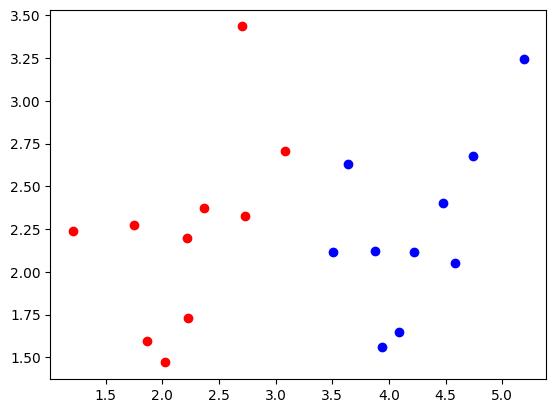

In [7]:
plt.scatter(X0[0], X0[1], c='r')
plt.scatter(X1[0], X1[1], c='b')

In [28]:
X = np.concatenate((X0, X1), axis = 1) # gộp 2 tập dữ liệu lại
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # đánh nhãn 1 cho class 1 và -1 cho class 2
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0) # thêm 1 vào vector x để nhân với w0

In [51]:
def numerical_grad(fx, w, X, y, eps=1e-6):
    grad = np.zeros_like(w)
    perturb = np.zeros_like(w)
    for i in range(w.size):
        perturb[i] = eps # tạo một vector có giá trị eps tại vị trí thứ i
        loss1 = fx(X, y, w + perturb) # tính loss tại w + eps
        loss2 = fx(X, y, w - perturb) # tính loss tại w - eps
        grad[i] = (loss1 - loss2) / (2 * eps) # tính đạo hàm tại biến thứ i
        perturb[i] = 0  # reset lại perturb
    return grad
def loss_function(X, y, w):
    return np.sum(-y * (w.T.dot(X)))
def h(w, x):    
    return np.sign(np.dot(w.T, x))
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) 

In [52]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1) 
            yi = y[0, mix_id[i]] # lấy điểm dữ liệu và nhãn tương ứng
            if h(w[-1], xi)[0] != yi: # nếu phân loại sai thì cập nhật lại w
                grad = numerical_grad(loss_function, w[-1], xi, yi, eps=1e-6)
                w_new = w[-1] - grad  # Cập nhật w
                w.append(w_new)
                mis_points.append(mix_id[i])
        if has_converged(X, y, w[-1]):
            break
    return w, mis_points

In [53]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

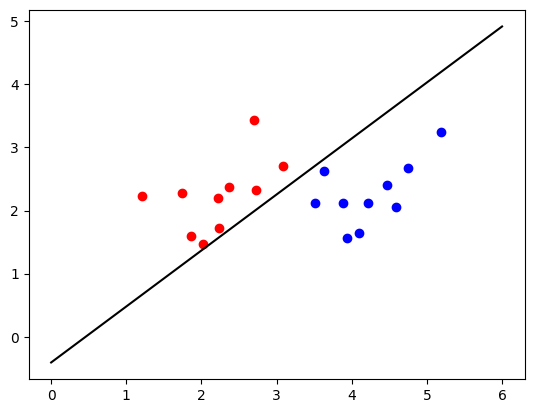

In [54]:
plt.scatter(X0[0], X0[1], c='r')
plt.scatter(X1[0], X1[1], c='b')
plt.plot([0, 6], [-(w[-1][0] + w[-1][1]*0)/w[-1][2], -(w[-1][0] + w[-1][1]*6)/w[-1][2]], 'k')